# Machine Learning Pipeline for Classification of Dataset

By: `Emmanuel Mande`


The goal here is to build a Machine Learning (ML) pipeline with algorithms to help me predict the 'CLASS' in the data sets "AMP_TrainSet.csv", which is the training dataset and "Test.csv", which is the testing dataset.

Useful Resources:

1. [Machine Learning Mastery](https://machinelearningmastery.com/)
2. [Medium-Machine Learning](https://medium.com/topic/machine-learning)
3. [Towards Data Science](https://towardsdatascience.com/)
4. [Andreas Mueller-Introduction to ML with Python](https://github.com/amueller/introduction_to_ml_with_python)
5. [Free Code Camp- Machine Learning](https://www.freecodecamp.org/news/tag/machine-learning/)
6. [nkmk note](https://note.nkmk.me/en/)

## Contents
1. Importing ML libraries
2. Reading Data
3. Sneak peek at the data
4. Correletions Between Attributes
5. Examine Skewness of the Data
6. Data Visualization
7. Prepare Data For Machine Learning
8. Evaluation of the algorithms
9. Predictions with the Algorithms
10. Conclusion

### Importing ML libraries.
"Libraries are sets of routines and functions that are written in a given language. A robust set of libraries can make it easier for developers to perform complex tasks without rewriting many lines of code." -[Shubhi Asthana](https://www.freecodecamp.org/news/essential-libraries-for-machine-learning-in-python-82a9ada57aeb/)

Much as ML has numerous libraries at our disposal for use, the ones am going to use in this pipeline include;
1. [Numpy](https://numpy.org/)(Numerical Python) - a library consisting of multidimensional array objects and a collection of routines for processing those arrays. It's ideal for scientific computations.
2. [Pandas](https://pandas.pydata.org/) - Offers data structures and operations for manipulating, analysis and cleaning dataframes and series. This will be handy because the data am going to work with is tabular.
3. [Matplotlib](https://matplotlib.org/) - It is a standard Python library used by every data scientist for creating 2D plots and graphs. It's thus ideal for data visualization.
4. [Seaborn](https://seaborn.pydata.org/tutorial.html)- It's a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.
5. [Scikit-learn](https://scikit-learn.org/stable/index.html) - It's one the most popular ML libraries. It's built on two basic libraries of Python, NumPy and SciPy. It adds a set of algorithms for common machine learning and data mining tasks, including clustering, regression and classification.

To import these libraries into my environment, am going to use python's `import` statement.

In [39]:
#Loeding the libraries to use
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

#more libraries, especially from the sklearn, will be imported along the way.

## Reading Data

Here, am going to take a close look at the data, in order to have a clue on which algorithms i can use.

I need to first list the contents in my working directory, this will help me be sure the files am working with are in the same directory.

In [42]:
#First, I need to know and list the contents of the directoryy where am working from.
#This will help me be sure that the data am working on is in my working directory, otherwise I'll have to specify their absolute paths to access them.
!pwd
!ls

/home/emmanuel/Desktop/bigdata/Kaggle/ace-class-notes/AMP Data Sets
AMP_TestSet.arff   array7.csv			     new.csv
AMP_TestSet.csv    array8.csv			     nu_handin.csv
AMP_TrainSet.arff  array.csv			     sample_handin.csv
AMP_TrainSet.csv   commit1.CSV			     svc.csv
array11.csv	   Emmanuel_Mande.ML_Pipeline.ipynb  Test.csv
array3.csv	   handin.csv			     try_1.csv
array4.csv	   Naive.csv			     try_2.csv
array5.csv	   new1.csv			     Untitled.ipynb


In [43]:
#Loading the "AMP_TrainSet.csv" with pandas as 'df' and 'testdata'
#I'll also use pandas to explore the data with desctiptive statistics and data visualisation
df = pd.read_csv('AMP_TrainSet.csv') #
testdata = pd.read_csv('Test.csv')

## Sneak peek at the data

To get an insight of the kind of data am dealing with and have an idea of how to get along with it.

### Dimensions of the dataset

In [4]:
#I need to look at the number of rows and columns (attributes) in my entire dataset
print(df.shape) #This will print rows and columns as a tuple (number of rows, number of columns)
print(df.shape[0]) #only the number of rows
print(df.shape[1]) #print only the number of columns

(3038, 12)
3038
12


In [5]:
print(df.head(3)) #prints the first 3 rows of the data
print(df.tail(3)) #prints the last 3 rows of the data

   FULL_Charge  FULL_AcidicMolPerc  FULL_AURR980107  FULL_DAYM780201  \
0          5.0               0.000            0.951           74.842   
1          4.0               5.405            0.931           71.595   
2          5.5               5.405            0.873           73.595   

   FULL_GEOR030101  FULL_OOBM850104  NT_EFC195  AS_MeanAmphiMoment  \
0            0.975           -3.663          0               0.282   
1            0.957           -4.011          1               0.600   
2            0.961           -2.512          0               0.593   

   AS_DAYM780201  AS_FUKS010112  CT_RACS820104  CLASS  
0         73.444          5.661          1.041      1  
1         68.222          6.537          1.453      1  
2         69.444          4.934          1.722      1  
      FULL_Charge  FULL_AcidicMolPerc  FULL_AURR980107  FULL_DAYM780201  \
3035         -1.5              12.500            1.091           76.542   
3036          2.0               5.000            0.849  

In [6]:
#I need to know more about this data, so am going to use 'info' to get a collective information on the data including data types missing data etc
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3038 entries, 0 to 3037
Data columns (total 12 columns):
FULL_Charge           3038 non-null float64
FULL_AcidicMolPerc    3038 non-null float64
FULL_AURR980107       3038 non-null float64
FULL_DAYM780201       3038 non-null float64
FULL_GEOR030101       3038 non-null float64
FULL_OOBM850104       3038 non-null float64
NT_EFC195             3038 non-null int64
AS_MeanAmphiMoment    3038 non-null float64
AS_DAYM780201         3038 non-null float64
AS_FUKS010112         3038 non-null float64
CT_RACS820104         3038 non-null float64
CLASS                 3038 non-null int64
dtypes: float64(10), int64(2)
memory usage: 284.9 KB
None


In [7]:
print(df.isnull().sum()) #print a summary of the missing values in the data

FULL_Charge           0
FULL_AcidicMolPerc    0
FULL_AURR980107       0
FULL_DAYM780201       0
FULL_GEOR030101       0
FULL_OOBM850104       0
NT_EFC195             0
AS_MeanAmphiMoment    0
AS_DAYM780201         0
AS_FUKS010112         0
CT_RACS820104         0
CLASS                 0
dtype: int64


What I can tell from the above information is that the data am dealing with is numerical and has no missing values in it.  It has 12 attributes and 3,038 rows.
What a great way to start!!!

### Statistical Summary

In [8]:
# Now I can dive deeper into the data by obtaining some mathematical summaries like mean, SD, max median and Min values,  etc.
#There I can know exactly how my data is spread and shaped.
print(df.describe())

       FULL_Charge  FULL_AcidicMolPerc  FULL_AURR980107  FULL_DAYM780201  \
count  3038.000000         3038.000000      3038.000000      3038.000000   
mean      2.060237            8.521520         0.971410        73.668760   
std       3.819929            7.586652         0.107413         8.527489   
min     -16.000000            0.000000         0.684000        42.750000   
25%       0.000000            2.516000         0.895000        68.294000   
50%       2.000000            7.143000         0.963000        74.059500   
75%       4.000000           13.158000         1.041000        79.343750   
max      30.000000           46.667000         1.451000       101.682000   

       FULL_GEOR030101  FULL_OOBM850104    NT_EFC195  AS_MeanAmphiMoment  \
count      3038.000000      3038.000000  3038.000000         3038.000000   
mean          0.994007        -2.432927     0.088545           15.683233   
std           0.031333         1.707223     0.284133           11.575665   
min        

I can now see that the data am working with has varying scales between the attributes with various ranges.

Now this can be a puzzle to deal with, because i will need to harmonize this!!!!

### Class Distribution

CLASS
0    1519
1    1519
dtype: int64


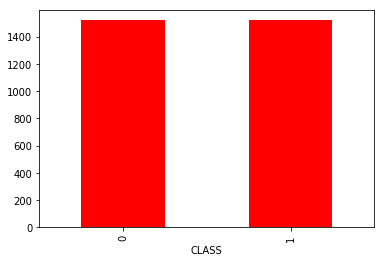

In [9]:
#Now, I need to look at how balanced or distributed my CLASS values are.
cd = df.groupby('CLASS').size()
print(cd)
cd.plot(kind='bar',color='red') #visualiza a bar chart for the class distribution

The data am working with is well distributed between the two classifications (0 and 1)

## Correletions Between Attributes

Correlation is a measure of how variables within a dataset can be related. This usually happens for lots of reasons.
For example:

    One variable could cause or depend on the values of another variable.
    One variable could be lightly associated with another variable.
    Two variables could depend on a third unknown variable.

It can be useful in data analysis and modeling to better understand the statistical relationships between variables. A correlation could be positive, meaning both variables move in the same direction, or negative, meaning that when one variable’s value increases, the other variables’ values decrease. Correlation can also be neural or zero, meaning that the variables are unrelated.

In [10]:
cor = df.corr() #Using the corr function in pandas, I can get the pearson's correlation.
print(cor)

                    FULL_Charge  FULL_AcidicMolPerc  FULL_AURR980107  \
FULL_Charge            1.000000           -0.612996        -0.490977   
FULL_AcidicMolPerc    -0.612996            1.000000         0.794796   
FULL_AURR980107       -0.490977            0.794796         1.000000   
FULL_DAYM780201       -0.434603            0.541481         0.548253   
FULL_GEOR030101       -0.058725            0.115201         0.346139   
FULL_OOBM850104       -0.283758            0.513344         0.462712   
NT_EFC195              0.088068           -0.143168        -0.169540   
AS_MeanAmphiMoment     0.355477           -0.431590        -0.426097   
AS_DAYM780201         -0.365374            0.449621         0.456260   
AS_FUKS010112         -0.090570            0.002334         0.032958   
CT_RACS820104          0.232929           -0.213543        -0.403599   
CLASS                  0.534602           -0.598816        -0.584111   

                    FULL_DAYM780201  FULL_GEOR030101  FULL_OOBM

In [11]:
#I can also chose to select out the correlation in regards to the CLASS.
#I'll need to do this by indexing the 'CLASS' in the correlated data.
cor['CLASS']

FULL_Charge           0.534602
FULL_AcidicMolPerc   -0.598816
FULL_AURR980107      -0.584111
FULL_DAYM780201      -0.554838
FULL_GEOR030101      -0.260470
FULL_OOBM850104      -0.453287
NT_EFC195             0.260702
AS_MeanAmphiMoment    0.693552
AS_DAYM780201        -0.437168
AS_FUKS010112         0.033432
CT_RACS820104         0.267652
CLASS                 1.000000
Name: CLASS, dtype: float64

I can now see that the correlations are distributed from 0

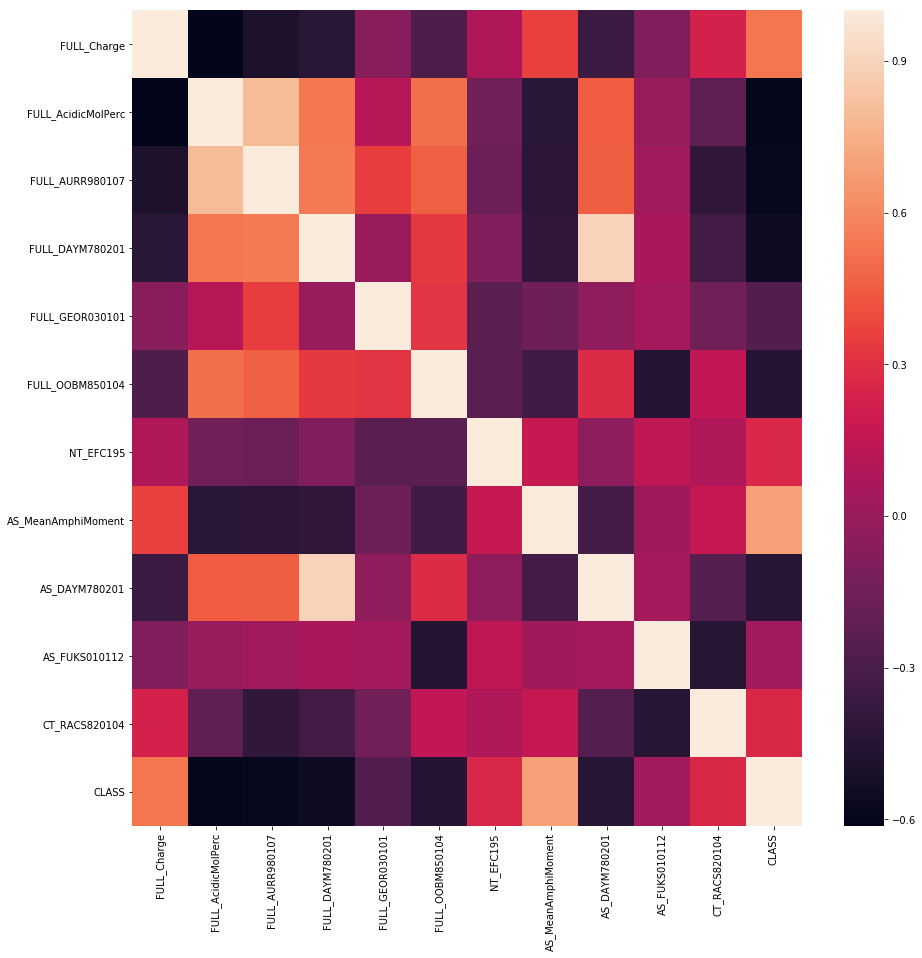

In [12]:
#In order to beautifully see the whole correlation, I can use Seaborn's heatmap.
plt.figure(figsize=(15,15))
sns.heatmap(cor)

Some data is negatively correlated

## Examine Skewness of the Data
Skewed data is common in data science. 
Skewness is a quantifiable measure of how distorted a data sample is from the normal distribution. In normal distribution, the data is represented graphically in a bell-shaped curve, where the mean (average) and mode (maximum value in the data set) are equal. 

In most models, any form of skewness is undesirable, since it leads to excessively large variance in estimates. Other models require unbiased estimators or Gaussian models to function accurately. In either case, the goal is to reduce skewness to get as close as possible to a normal distribution (normalizing data), by using “transformations,” such as taking the inverse, logarithm or square roots of all the datapoints.

You can calculate the skew of each attribute using the '`skew()`' function on the Pandas DataFrame.

In [44]:
# Review the skew of attribute distributions in the data
print(df.skew())

FULL_Charge           0.601716
FULL_AcidicMolPerc    0.994487
FULL_AURR980107       0.490291
FULL_DAYM780201      -0.216841
FULL_GEOR030101       0.883022
FULL_OOBM850104      -0.207124
NT_EFC195             2.898124
AS_MeanAmphiMoment    0.383682
AS_DAYM780201        -0.070879
AS_FUKS010112        -0.112632
CT_RACS820104         0.999487
CLASS                 0.000000
dtype: float64


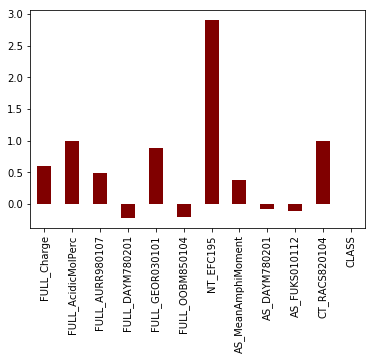

In [45]:
df.skew().plot(kind='bar',color='maroon')

The skew results show a positive (right) or negative (left) skew. Values closer to zero show less skew. attribute 'NT_EFC195' is highly skewed to the right compared to the rest.

## Data Visualization

### Univariate plots

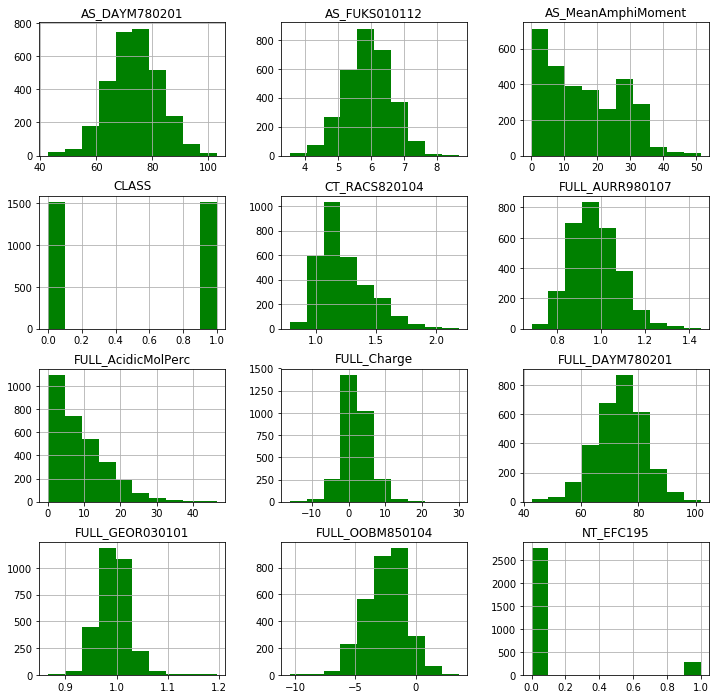

In [15]:
# Univariate Histograms
from matplotlib import pyplot #importing pyplot from matplotlib library
df.hist(figsize=(12,12), color='green')
pyplot.show()

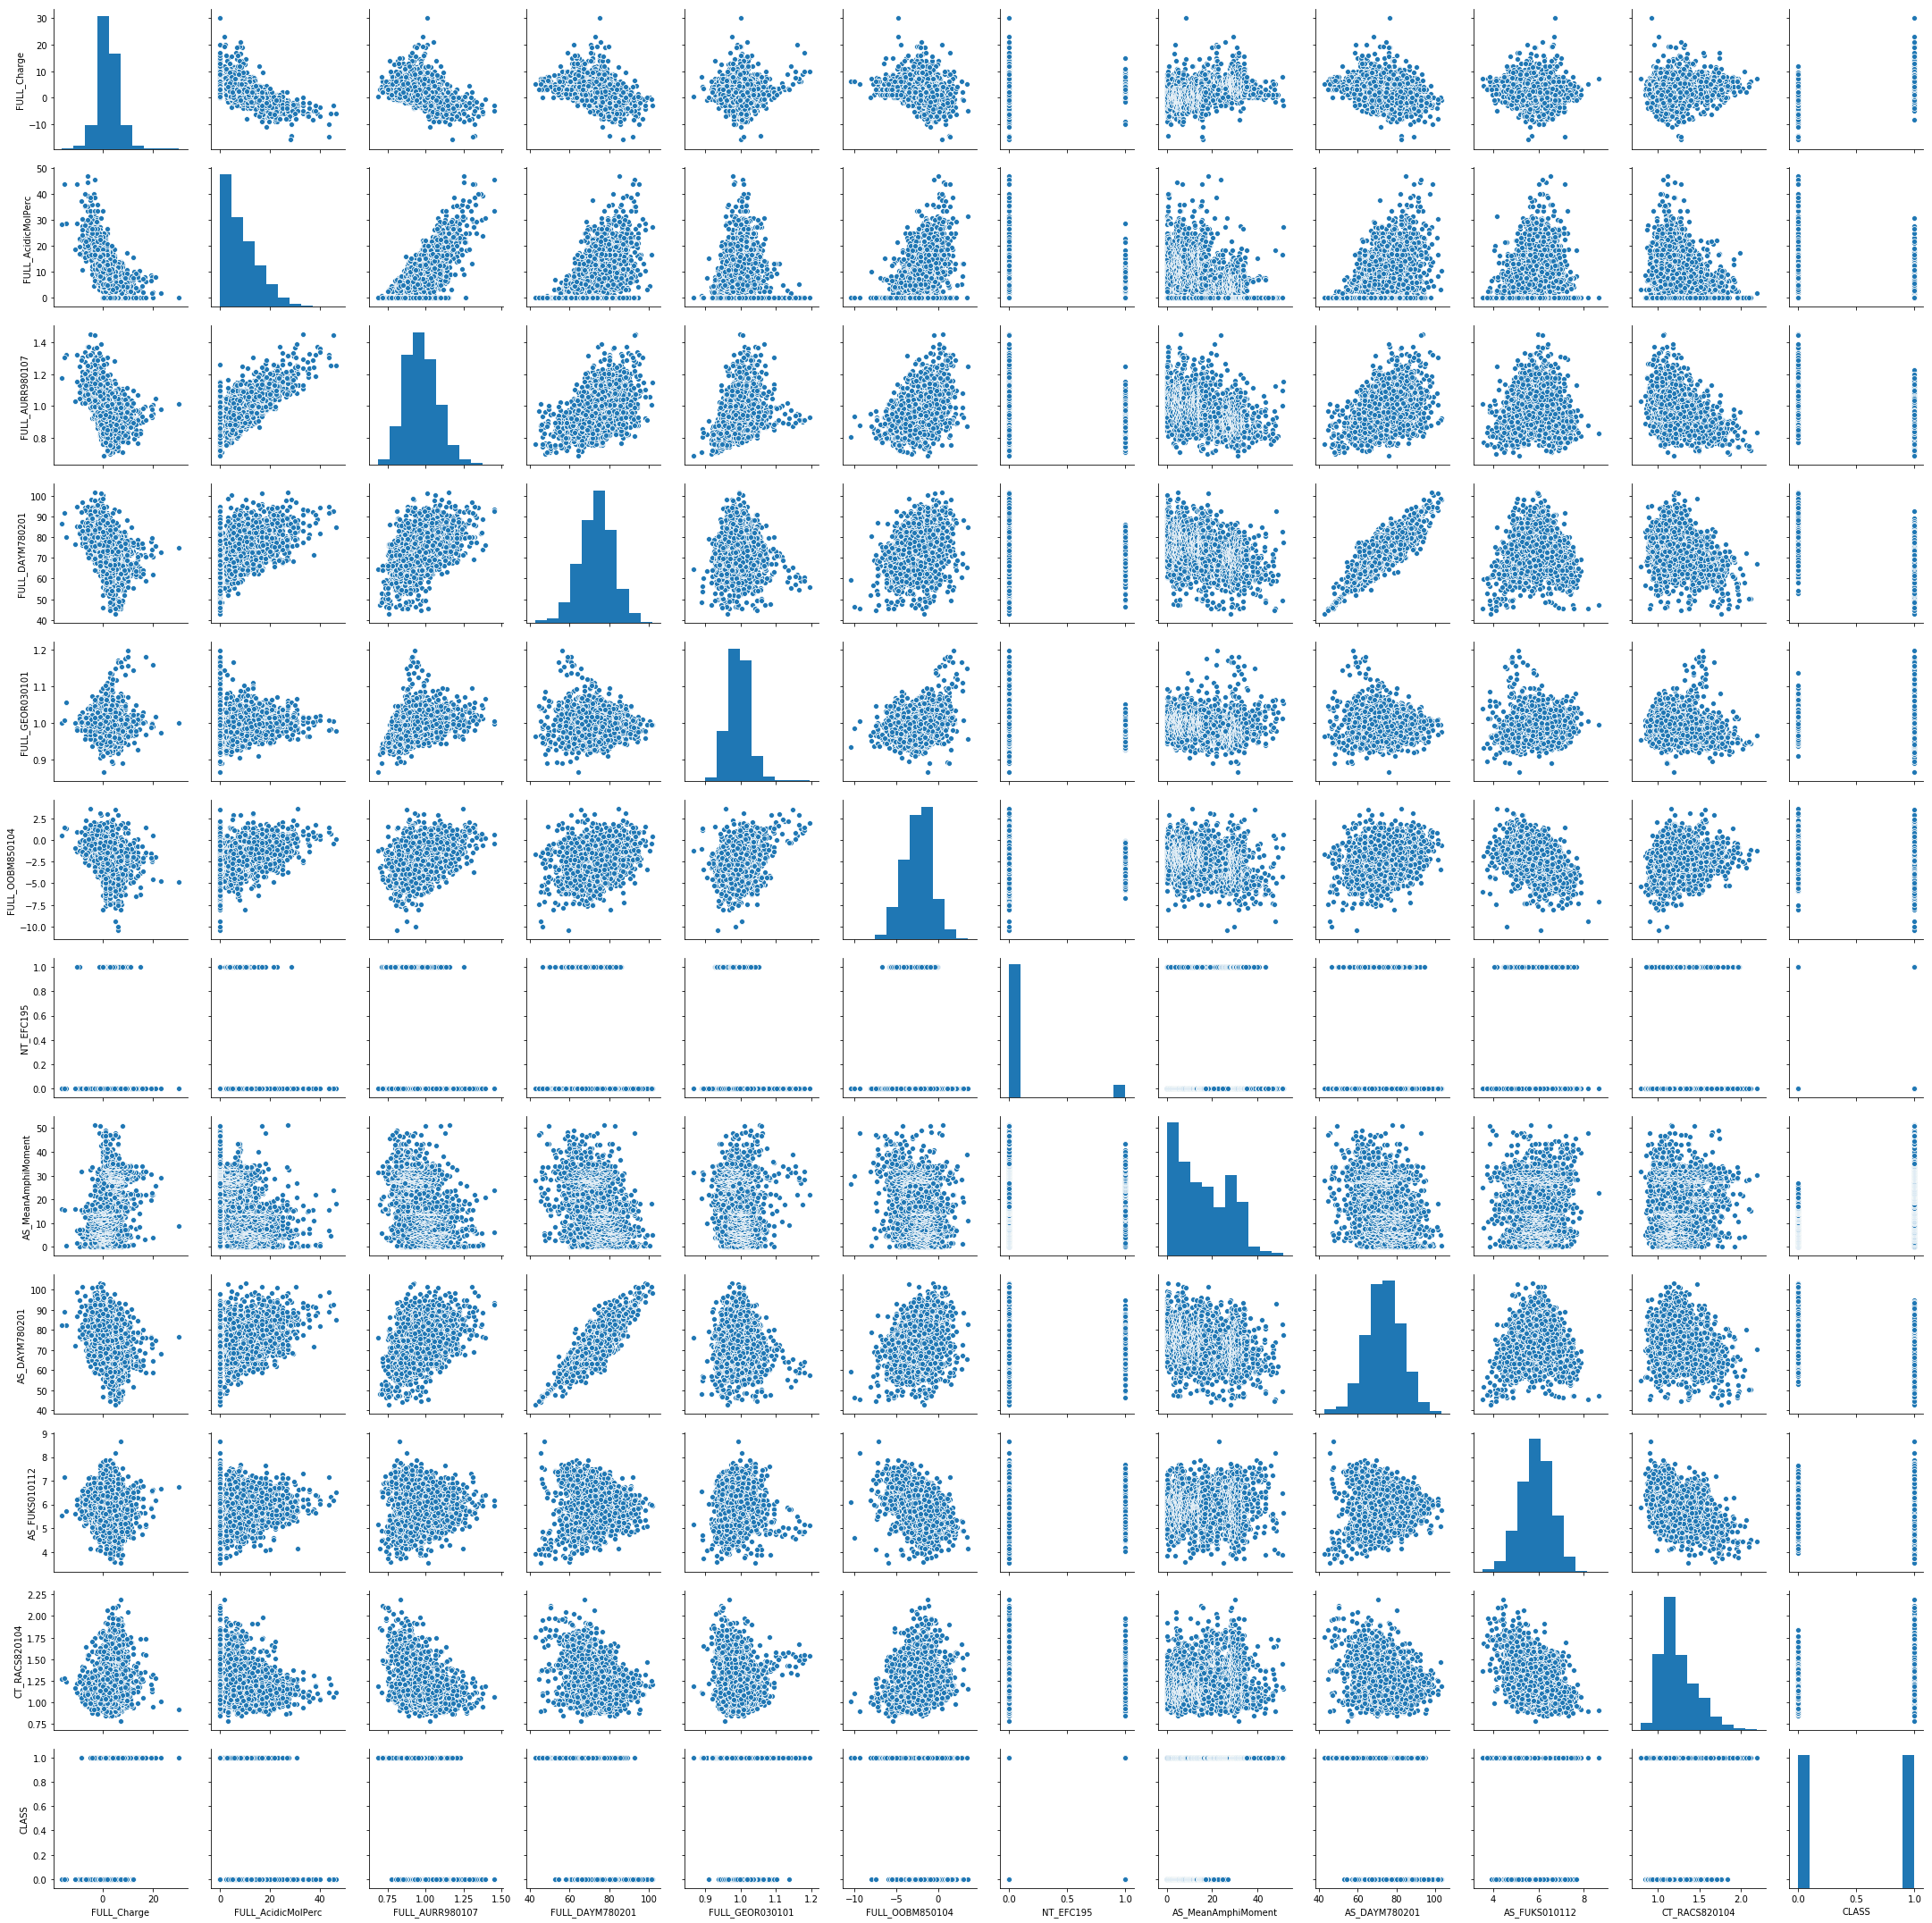

In [16]:
sns.pairplot(df)

In [17]:
#I have realized that unnecessary warnings keep poping up when training my dataset.
#Let me remove the annoying warnings from my cells.
import warnings
warnings.filterwarnings('ignore')

## Prepare Data For Machine Learning

In [68]:
#Import required libraries from sklearn and xgboost
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier

### Validation dataset

In [121]:
#Create array objects from the data
df_array = df.values

# separate array into input and output components
X = df_array[:,0:11]
Y = df_array[:,11]

### Rescaling Data

Since the data has got varying scales between and within the different attributes, I'll need to rescale it between 0 and 1.

In [134]:
# Rescaling data (between 0 and 1)
scaler = MinMaxScaler(feature_range=(0, 1))
rescaled = scaler.fit_transform(X)

# summarize the transformed data
print(rescaled[:3,:])

[[0.457 0.    0.348 0.545 0.33  0.483 0.    0.005 0.508 0.415 0.182]
 [0.435 0.116 0.322 0.489 0.276 0.458 1.    0.011 0.421 0.586 0.475]
 [0.467 0.116 0.246 0.523 0.288 0.565 0.    0.011 0.442 0.273 0.666]]


Rescaling gave me very low predictions on all the algorithms, so i did not use it.

### Standadizing the data

In [103]:
# Standardize data (0 mean, 1 stdev)
scaler = StandardScaler().fit(X)
stdscaled = scaler.transform(X)

# summarize transformed data
print(stdscaled[0:3,:])

[[ 0.77  -1.123 -0.19   0.138 -0.607 -0.721 -0.312 -1.331 -0.023 -0.361
  -0.925]
 [ 0.508 -0.411 -0.376 -0.243 -1.181 -0.925  3.208 -1.303 -0.592  0.902
   1.037]
 [ 0.901 -0.411 -0.916 -0.009 -1.054 -0.046 -0.312 -1.304 -0.459 -1.409
   2.318]]


This gave me very low predictions on all the algorithms, so i did not use it.

### Normalize Data

In [72]:
# Normalize data (length of 1)
scaler = Normalizer().fit(X)
normalized = scaler.transform(X)
# summarize transformed data
set_printoptions(precision=3)
print(normalized[0:5,:])

[[ 0.048  0.     0.009  0.711  0.009 -0.035  0.     0.003  0.698  0.054
   0.01 ]
 [ 0.04   0.054  0.009  0.72   0.01  -0.04   0.01   0.006  0.686  0.066
   0.015]
 [ 0.054  0.053  0.009  0.724  0.009 -0.025  0.     0.006  0.683  0.049
   0.017]
 [ 0.053  0.044  0.009  0.699  0.011 -0.014  0.     0.006  0.71   0.046
   0.015]
 [ 0.076  0.087  0.009  0.658  0.01  -0.021  0.     0.006  0.742  0.046
   0.016]]


## Evaluation of the algorithms

Since am not sure which algorithms to use, I need to first evaluate them to see which one could work for me.

In [126]:
#Configure Algorithm Evaluation Test Harness
# Test options and evaluation metric
num_folds = 20 #Number of folds to use
seed = 7 #Reproducibility
scoring = 'accuracy'

### K-fold Cross Validation
Cross-validation is a statistical method used to estimate the skill of machine learning models. It's a resampling procedure used to evaluate machine learning models on a limited data sample. The results of a k-fold cross-validation run are often summarized with the mean of the model skill scores.

#### K-Fold on Logistic Regression

In [105]:
kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=True)
model = LogisticRegression()

results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)

print("Accuracy:", (results.mean()*100.0, results.std()*100.0))

Accuracy: (91.70466095825601, 1.4209276532368327)


#### K-Fold on Linear Discriminant Analysis

In [106]:
kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=True)
model = LinearDiscriminantAnalysis()

results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)

print("Accuracy:", (results.mean()*100.0, results.std()*100.0))

Accuracy: (91.7379242533317, 1.0319800779483692)


#### K-Fold on K-Neighbors Classifier

In [107]:
kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=True)
model = KNeighborsClassifier()

results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)

print("Accuracy:", (results.mean()*100.0, results.std()*100.0))

Accuracy: (92.82439516404365, 0.9439362672299958)


#### K-Fold on Naive Bayes

In [108]:
kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=True)
model = GaussianNB()

results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)

print("Accuracy:", (results.mean()*100.0, results.std()*100.0))

Accuracy: (92.0021772338595, 1.5564949912304917)


#### K-Fold on SVC

In [109]:
kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=True)
model = SVC()

results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)

print("Accuracy:", (results.mean()*100.0, results.std()*100.0))

Accuracy: (93.81156392112796, 1.3137221627688358)


#### K-Fold on XGBClassifier

In [110]:
kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=True)
model = SVC()
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)

print("Accuracy:", (results.mean()*100.0, results.std()*100.0))

Accuracy: (93.81156392112796, 1.3137221627688358)


From the above K-Fold validations, Naive Bayes gives me the highest  accuracy.

### Consistent Test Harness

Lets use the test herness to compare the different algorithms. 

In [111]:
# Prepare models and add them to the list of Algorithms to Evaluate.
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('XGB',XGBClassifier()))

In [112]:
# evaluate each model in turn
results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=7)
    cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = (name, cv_results.mean(), cv_results.std())
    print(msg)

('LR', 0.8373382404029875, 0.2696816143329222)
('LDA', 0.8535044293903076, 0.2571395669719574)
('KNN', 0.8837914712523883, 0.1382724911237052)
('CART', 0.7365468125759944, 0.2835506083253305)
('NB', 0.880815746048289, 0.11642272449162755)
('SVM', 0.8755569306930692, 0.18826176997422048)
('XGB', 0.7583137919055064, 0.293044002774291)


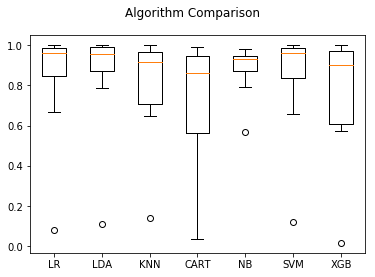

In [62]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

From these results, it would suggest that Naive Bayes, logistic regression and linear discriminant analysis are perhaps worthy of further study on this problem.

## Predictions with the Algorithms

### Predicting with Logistic Regression

Logistic regression assumes a Gaussian distribution for the numeric input variables and can model binary classification problems. You can construct a logistic regression model using the LogisticRegression class

In [138]:
#Selecting the algorithm to use
model = LogisticRegression()

#Training the algorithm on the training dataset
model.fit(X,Y)

#Make predictions for the test dataset and save the predictions in file dt
dt = model.predict(testdata.values) 

#Convert the dt (in array) to pandas dataframe, dtt
dtt = pd.DataFrame(dt)

#Name the predictions, CLASS
dtt.columns = ['CLASS']

#Create an Index for the CLASS
dtt.index.name = "Index"

#Replacing zeros and ones with False and True, respectively
dtt.replace(0.0,'False')
dtt['CLASS']=dtt['CLASS'].map({0.0:False, 1.0:True})

#Save the dataframe to a .csv file
dtt.to_csv("LR.csv")

#Summarise the predictions
print(dtt['CLASS'].unique())
print(dtt.groupby('CLASS').size()[0].sum())
print(dtt.groupby('CLASS').size()[1].sum())

[False  True]
383
375


This model scored `0.82852`

### Predicting with Linear Discriminant Analysis

Linear Discriminant Analysis or LDA is a statistical technique for binary and multiclass classification. It too assumes a Gaussian distribution for the numerical input variables. You can construct an LDA model using the LinearDiscriminantAnalysis class

In [139]:
#Selecting the algorithm to use
model = LinearDiscriminantAnalysis()

#Training the algorithm on the training dataset
model.fit(X,Y)

#Make predictions for the test dataset and save the predictions in file dt
dt = model.predict(testdata.values) 

#Convert the dt (in array) to pandas dataframe, dtt
dtt = pd.DataFrame(dt)

#Name the predictions, CLASS
dtt.columns = ['CLASS']

#Create an Index for the CLASS
dtt.index.name = "Index"

#Replacing zeros and ones with False and True, respectively
dtt.replace(0.0,'False')
dtt['CLASS']=dtt['CLASS'].map({0.0:False, 1.0:True})

#Save the dataframe to a .csv file
dtt.to_csv("LDA.csv")

#Summarise the predictions
print(dtt['CLASS'].unique())
print(dtt.groupby('CLASS').size()[0].sum())
print(dtt.groupby('CLASS').size()[1].sum())

[False  True]
401
357


This model scored `0.82003`

### Predicting with K-Neighbors Classifier

The k-Nearest Neighbors algorithm (or KNN) uses a distance metric to find the k most similar instances in the training data for a new instance and takes the mean outcome of the neighbors as the prediction. You can construct a KNN model using the KNeighborsClassifier class

In [140]:
#Selecting the algorithm to use
model = KNeighborsClassifier()

#Training the algorithm on the training dataset
model.fit(X,Y)

#Make predictions for the test dataset and save the predictions in file dt
dt = model.predict(testdata.values) 

#Convert the dt (in array) to pandas dataframe, dtt
dtt = pd.DataFrame(dt)

#Name the predictions, CLASS
dtt.columns = ['CLASS']

#Create an Index for the CLASS
dtt.index.name = "Index"

#Replacing zeros and ones with False and True, respectively
dtt.replace(0.0,'False')
dtt['CLASS']=dtt['CLASS'].map({0.0:False, 1.0:True})

#Save the dataframe to a .csv file
dtt.to_csv("KNN.csv")

#Summarise the predictions
print(dtt['CLASS'].unique())
print(dtt.groupby('CLASS').size()[0].sum())
print(dtt.groupby('CLASS').size()[1].sum())

[False  True]
402
356


This model scored `0.77436`

### Prediction with Classification and Regression Trees

Classification and Regression Trees (CART or just decision trees) construct a binary tree from the training data. Split points are chosen greedily by evaluating each attribute and each value of each attribute in the training data in order to minimize a cost function (like the Gini index). You can construct a CART model using the DecisionTreeClassifier class

In [141]:
#Selecting the algorithm to use
model = DecisionTreeClassifier()

#Training the algorithm on the training dataset
model.fit(X,Y)

#Make predictions for the test dataset and save the predictions in file dt
dt = model.predict(testdata.values) 

#Convert the dt (in array) to pandas dataframe, dtt
dtt = pd.DataFrame(dt)

#Name the predictions, CLASS
dtt.columns = ['CLASS']

#Create an Index for the CLASS
dtt.index.name = "Index"

#Replacing zeros and ones with False and True, respectively
dtt.replace(0.0,'False')
dtt['CLASS']=dtt['CLASS'].map({0.0:False, 1.0:True})

#Save the dataframe to a .csv file
dtt.to_csv("CART.csv")

#Summarise the predictions
print(dtt['CLASS'].unique())
print(dtt.groupby('CLASS').size()[0].sum())
print(dtt.groupby('CLASS').size()[1].sum())

[ True False]
383
375


This model scored `0.74665`

### Predicting with Naive Bayes model

Naive Bayes calculates the probability of each class and the conditional probability of each class given each input value. These probabilities are estimated for new data and multiplied together, assuming that they are all independent (a simple or naive assumption). When working with real-valued data, a Gaussian distribution is assumed to easily estimate the probabilities for input variables using the Gaussian Probability Density Function. You can construct a Naive Bayes model using the GaussianNB class

In [137]:
#Selecting the algorithm to use
model = GaussianNB()

#Training the algorithm on the training dataset
model.fit(X,Y)

#Make predictions for the test dataset and save the predictions in file dt
dt = model.predict(testdata.values) 

#Convert the dt (in array) to pandas dataframe, dtt
dtt = pd.DataFrame(dt)

#Name the predictions, CLASS
dtt.columns = ['CLASS']

#Create an Index for the CLASS
dtt.index.name = "Index"

#Replacing zeros and ones with False and True, respectively
dtt.replace(0.0,'False')
dtt['CLASS']=dtt['CLASS'].map({0.0:False, 1.0:True})

#Save the dataframe to a .csv file
dtt.to_csv("Gaussian.csv")

#Summarise the predictions
print(dtt['CLASS'].unique())
print(dtt.groupby('CLASS').size()[0].sum())
print(dtt.groupby('CLASS').size()[1].sum())

[ True False]
370
388


This model scored `0.99559`

### Prediction with Support Vector Machines (SVC)

Support Vector Machines (or SVM) seek a line that best separates two classes. Those data instances that are closest to the line that best separates the classes are called support vectors and influence where the line is placed. SVM has been extended to support multiple classes. Of particular importance is the use of different kernel functions via the kernel parameter. A powerful Radial Basis Function is used by default. You can construct an SVM model using the SVC class

In [142]:
#Selecting the algorithm to use
model = SVC()

#Training the algorithm on the training dataset
model.fit(X,Y)

#Make predictions for the test dataset and save the predictions in file dt
dt = model.predict(testdata.values) 

#Convert the dt (in array) to pandas dataframe, dtt
dtt = pd.DataFrame(dt)

#Name the predictions, CLASS
dtt.columns = ['CLASS']

#Create an Index for the CLASS
dtt.index.name = "Index"

#Replacing zeros and ones with False and True, respectively
dtt.replace(0.0,'False')
dtt['CLASS']=dtt['CLASS'].map({0.0:False, 1.0:True})

#Save the dataframe to a .csv file
dtt.to_csv("SVC.csv")

#Summarise the predictions
print(dtt['CLASS'].unique())
print(dtt.groupby('CLASS').size()[0].sum())
print(dtt.groupby('CLASS').size()[1].sum())

[False  True]
397
361


This model scored `0.81311`

### Conclussion

From the above predictions, the Naive Bayes model scored the highest and thus was the ideal for this dataset. However, This doesnot mean that other algorithms could not predict any better, I believe that once they are tunned and data preprocessed right, their predictions for this data would actually change.